In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.gridspec as gridspec
import pickle5
sys.path.append( "../../data_evaluation")
import handle_dictionaries
import spikeTrainAnalysis as sta
from scipy.interpolate import griddata

from scipy.optimize import curve_fit

Notes

- go to sections "plot functions" and compile

# generate Figure from preevaluated data

backup data found
backup data found


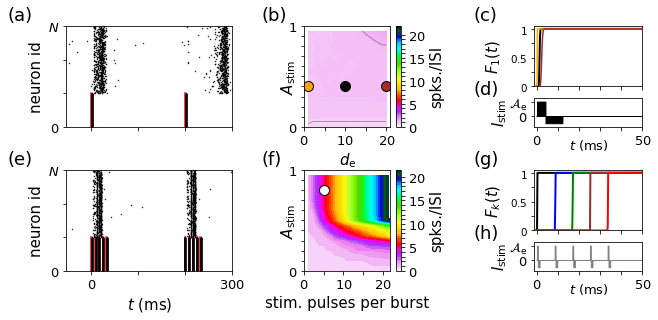

In [6]:
labelFontsize = 15
ticksFontsize = 13

fig = plt.figure( figsize = (10,4) )

#x1, x2, x3, x4, x5, x6, x7, x8 = 0.05,0.28,0.36,0.48,0.6,0.75, 0.85,0.95
x1, x2, x3, x4, x5, x6, x7, x8 = 0.05,0.28,0.38,0.53,0.7,0.85, 0.85,0.95
y1,y2,y3,y4,y5,y6    = 0.08,0.15,0.16,0.18,0.22,0.43
y7,y8,y9,y10,y11,y12 = 0.58,0.65,0.66,0.68,0.72,0.93

# electrical stimuli
gs_e_raster  = gridspec.GridSpec(1, 1)
gs_e_raster .update( left=x1, right=x2, top=y12, bottom=y7 )

gs_e_spikesPerStimulus  = gridspec.GridSpec(1, 1)
gs_e_spikesPerStimulus.update( left=x3, right=x4, top=y12, bottom=y7 )

gs_e_dist  = gridspec.GridSpec(1, 1)
gs_e_dist .update( left=x5, right=x6, top=y12, bottom=y11 )
gs_e_pulse  = gridspec.GridSpec(1, 1)
gs_e_pulse .update( left=x5, right=x6, top=y10, bottom=y7 )

gs_e_sigma  = gridspec.GridSpec(1, 1)
gs_e_sigma.update( left=x7, right=x8, top=y12, bottom=y7 )

# electrical burst stimuli
gs_eb_raster  = gridspec.GridSpec(1, 1)
gs_eb_raster.update( left=x1, right=x2, top=y6, bottom=y1 )
gs_eb_spikesPerStimulus  = gridspec.GridSpec(1, 1)
gs_eb_spikesPerStimulus.update( left=x3, right=x4, top=y6, bottom=y1 )
gs_eb_dist  = gridspec.GridSpec(1, 1)
gs_eb_dist .update( left=x5, right=x6, top=y6, bottom=y5 )
gs_eb_pulse  = gridspec.GridSpec(1, 1)
gs_eb_pulse .update( left=x5, right=x6, top=y4, bottom=y1 )
gs_eb_sigma  = gridspec.GridSpec(1, 1)
gs_eb_sigma.update( left=x7, right=x8, top=y6, bottom=y1 )

fCR = 5.0 # Hz

### single pulse per stimulus
# raster single pulse
ax_e_raster = fig.add_subplot(gs_e_raster[0,0])
plot_raster_electrical_stimuli( ax_e_raster, labelFontsize , ticksFontsize, fCR  )

# spikes per stimulus
colormap = 'gist_ncar_r'
ax_e_spikesPerStimulus = fig.add_subplot(gs_e_spikesPerStimulus[0,0])
electrical_single_Pulse_plot_spikes_per_cycle( ax_e_spikesPerStimulus , labelFontsize , ticksFontsize, fCR )

# histogram and pulse
ax_e_dist = fig.add_subplot(gs_e_dist[0,0])
ax_e_pulse = fig.add_subplot(gs_e_pulse[0,0])
plot_cumulative_hist_electrical( ax_e_dist , ax_e_pulse, labelFontsize , ticksFontsize  )

#for de in np.arange(1.0,21.0):
colors = ['orange','brown']
de_values = [1.0,20.0]
for kde in range( len( de_values ) ):
    de = de_values[kde]
    # FIXME use corrected files here
    with open("data/dic_lambda_normalized_PLoS_electrical_burst_fCR_5.0_Astim_0.4_de_"+str(de)+"_ppb_1.pickle", "rb") as fh:
        data_dic = pickle5.load(fh)
    # data_dic = handle_dictionaries.dic_load( "data/dic_lambda_normalized_PLoS_electrical_burst_fCR_5.0_Astim_0.4_de_"+str(de)+"_ppb_1" )

    x = data_dic['bins ms']
    Lambda1 = data_dic['est_Lambda prob'][0]
    Lambda2 = data_dic['est_Lambda prob'][1]
    
    cumLambda1 = get_cumulative( data_dic['est_Lambda prob'][0] , 1.0 )
    cumLambda2 = get_cumulative( data_dic['est_Lambda prob'][1] , 1.0 )
    
    ax_e_dist.plot( x , cumLambda1, color=colors[kde], lw=1.5, label='$'+str(de)+'$' )
 
    ax_e_spikesPerStimulus.scatter([de],[0.4], facecolor=colors[kde], edgecolor='black', s=100)    
  
ax_e_spikesPerStimulus.scatter([10.0],[0.4], facecolor='black', edgecolor='black', s=100) 


### multiple pulses per stimulus
# raster single burst
ax_eb_raster = fig.add_subplot(gs_eb_raster[0,0])
plot_raster_eb_stimuli( ax_eb_raster, labelFontsize , ticksFontsize, fCR  )

# spikes per stimulus
de = 1.0
ax_eb_spikesPerStimulus = fig.add_subplot(gs_eb_spikesPerStimulus[0,0])
electrical_Burst_plot_spikes_per_cycle( ax_eb_spikesPerStimulus , labelFontsize , ticksFontsize, fCR, de )

ax_eb_spikesPerStimulus.scatter([5],[0.8], facecolor='white', edgecolor='black', s=100)

# histogram and pulse
ax_eb_dist = fig.add_subplot(gs_eb_dist[0,0])
ax_eb_pulse = fig.add_subplot(gs_eb_pulse[0,0])
plot_cumulative_hist_electricalBurst( ax_eb_dist , ax_eb_pulse, labelFontsize , ticksFontsize  )

# plot panel labels
multiplier = 16
ax_eb_pulse.text(-250,multiplier*2.6,'(a)', fontsize = 1.2*labelFontsize)
ax_eb_pulse.text(-130,multiplier*2.6,'(b)', fontsize = 1.2*labelFontsize)
ax_eb_pulse.text(-30,multiplier*2.6,'(c)', fontsize = 1.2*labelFontsize)
ax_eb_pulse.text(-30,multiplier*1.8,'(d)', fontsize = 1.2*labelFontsize)

ax_eb_pulse.text(-250,multiplier*1.04,'(e)', fontsize = 1.2*labelFontsize)
ax_eb_pulse.text(-130,multiplier*1.04,'(f)', fontsize = 1.2*labelFontsize)
ax_eb_pulse.text(-30,multiplier*1.04,'(g)', fontsize = 1.2*labelFontsize)
ax_eb_pulse.text(-30,multiplier*0.24,'(h)', fontsize = 1.2*labelFontsize)


# axes for cumulative distribution
for ax in [ax_e_dist, ax_eb_dist]:
    ax.set_yticks([0.0,0.25,0.5,0.75,1])
    ax.set_yticklabels(['$0$','','$0.5$','','$1$'], fontsize = 0.8*ticksFontsize)
    ax.set_ylim(0,1.05)
    


# plt.savefig('Fig2.svg', bbox_inches='tight')
# plt.savefig('Fig2.png', bbox_inches='tight', dpi=300)
# plt.savefig('Fig2.pdf', bbox_inches='tight')
# plt.savefig('Fig2.eps', bbox_inches='tight')

# plot functions (compile first)

In [2]:
# generates panel a: raster plot of the spike train for electrical single pulse stimuli
def plot_raster_electrical_stimuli( ax_raster, labelFontsize , ticksFontsize, fCR  ):
    
    seed = 10
    
    # define parameters
    e_pulse_scale = 10.0
    Astim = 0.4
    
    # set boundaries of time interval
    tmin = 3000.0+222*1.0/fCR-0.013-0.3 # sec
    tmax = tmin + 0.4 # sec
    tmax = tmin + 1.0 # sec
    
    backup_Filename = 'data/PLoS_electrical_plotspikeTrain_tmin_'+str(tmin)+'_tmax_'+str(tmax)+'_Astim_'+str(Astim)+'_e_pulse_scale_'+str(e_pulse_scale)+'.npz'
     
    if os.path.isfile( backup_Filename):
        print('backup data found')
        
        # load backup file
        dataset = np.load( backup_Filename )
        
        plotspikeTrain = dataset['spikeTrain']
        stimulus_onset_time_steps =  dataset['stimulus_onset_time_steps']
        
    else:
        print(backup_Filename)
        print('no backup data found load spike train from simulations')
        # get stimulus onset times
        # print( get_stimulus_onset_electrical( 1200001 , fCR , 0.1, 3 ) )
        stimulus_onset_time_steps = sta.dt*get_stimulus_onset_electrical( 1200001 , fCR , 0.1, 3 ) # ms
        stimulus_onset_time_steps = stimulus_onset_time_steps[ np.logical_and( sta.stepsToSec*stimulus_onset_time_steps+3000.0 > tmin , sta.stepsToSec*stimulus_onset_time_steps+3000.0 < tmax )  ]
        stimulus_onset_time_steps += 3000.0*1000.0 # ms
        
        
        # filenames
        # directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/distribution of spike response times/initial_seed_"+str(seed)+"/electrical_stimulation/phase_shifted_periodic_multisite_stimulation/Dalpha1_0.0_Dalpha2_0.0/fCR_7.0_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_100.0"
        
        print('WARNING: specify path to simulation data')
        # directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/distribution of spike response times/initial_seed_"+str(seed)+"/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_0.0_Dalpha2_0.0/pulses_per_burst_1/fCR_"+str(fCR)+"_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_100.0/"
        directory =                                       "/Users/jkromer/Desktop/Projects/Stanford/scratch/Output/distribution_of_spike_response_times/initial_seed_"+str(seed)+"/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_0.0_Dalpha2_0.0/pulses_per_burst_1/fCR_"+str(fCR)+"_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_100.0/"
        
        if os.path.isfile( directory+"/spikeTimes_3100_sec.npy" ):
            #print 'load data'
            # load data
            spike_train, weights = sta.load_Complete_SpikeTrain_And_Weigth_Trajectories([directory])

        # exclude spikes that are out of plot range
        plotspikeTrain = spike_train[ np.logical_and( sta.dt*sta.stepsToSec*spike_train[:,1] > tmin , sta.dt*sta.stepsToSec*spike_train[:,1] < tmax ) ]

        # generate backup file
        np.savez( backup_Filename , spikeTrain = plotspikeTrain , stimulus_onset_time_steps = stimulus_onset_time_steps )

#     k = 223
#     stimOnset = sta.dt*stimulus_logged_spiketrains[k]['hist']['bins_steps'][0]
#     next_stimOnset = sta.dt*stimulus_logged_spiketrains[k+1]['hist']['bins_steps'][0]-stimOnset
#     next_next_stimOnset = sta.dt*stimulus_logged_spiketrains[k+2]['hist']['bins_steps'][0]-stimOnset

    first_stimOnset = stimulus_onset_time_steps[0]
    
    ax_raster.scatter( sta.dt*plotspikeTrain[:,1]-first_stimOnset , plotspikeTrain[:,0], color = 'black' , s=0.2, zorder = 2 )
    
    for stimulus_onsets in stimulus_onset_time_steps:
        ax_raster.plot( [stimulus_onsets+0.2-first_stimOnset,stimulus_onsets+0.2-first_stimOnset] , [0,333] , color = 'red', zorder = 1  )

        
        
    # ticks and labels  
    ax_raster.set_yticks([0,333,666,1000])
    ax_raster.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize )
    ax_raster.set_ylabel('neuron id', fontsize = labelFontsize)
    ax_raster.set_ylim(0,1000)
    
    ax_raster.set_xticks([0,100,200,300,400,500,600])
    #ax_raster.set_xticklabels(['$0$','','$200$','','$400$','','$600$'], fontsize = ticksFontsize )
    ax_raster.set_xticklabels(['','','','','','',''], fontsize = ticksFontsize )
    #ax_raster.set_xlabel('$t$ in ms', fontsize = labelFontsize)
    ax_raster.set_xlim(-3-50,300)  # ms 
    
    
### generates panel b (spikes per stimulus for the case of single-pulse stimuli) 
def electrical_single_Pulse_plot_spikes_per_cycle( ax , labelFontsize , ticksFontsize, fCR ):
    
    # load simulation results
    dict_results_mean_spikes_per_cycle_2d_array = handle_dictionaries.dic_load( 'data/dic_PLoS_results_single_pulse_GRID' )

    data_grid = dict_results_mean_spikes_per_cycle_2d_array[fCR]
    
    ### spikes per cycle
    # cax3= ax.scatter( data_grid[:,:,0], data_grid[:,:,1], c=data_grid[:,:,3], vmin=0, vmax=22, cmap = 'hsv' )
    cax3= ax.contourf( data_grid[:,:,0], data_grid[:,:,1], data_grid[:,:,3], levels=np.arange(0,22,0.1), vmin=0, vmax=22, cmap = colormap )
    CS = ax.contour( data_grid[:,:,0], data_grid[:,:,1], data_grid[:,:,3], levels=np.arange(1,22,0.5)-0.75, vmin=0, vmax=22, colors='gray', linewidths=0.75 )
    #ax.clabel(CS, inline=1, fmt='%1.2f', fontsize=ticksFontsize)
    # cax2 = plt.contour( mean_AuC_data_eCR[:,:,0], mean_AuC_data_eCR[:,:,1], mean_AuC_data_eCR[:,:,3] , levels=[0.5,1.5,2.5,3.5], colors = 'black', linewidths=5 )
    # cax2 = plt.contour( mean_AuC_data_eCR[:,:,0], mean_AuC_data_eCR[:,:,1], mean_AuC_data_eCR[:,:,3] , levels=[0.5,1.5,2.5,3.5], colors = 'white', linewidths=3 )
    cbar=plt.colorbar(cax3, ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

    cbar.ax.set_yticklabels( ['$0$','','','','','$5$','','','','','$10$','','','','','$15$','','','','','$20$'] , fontsize= ticksFontsize )
    cbar.set_label( 'spks./ISI' , fontsize=labelFontsize)


    ax.set_xticks([0,5,10,15,20])
    ax.set_xticklabels(['$0$','','$10$','','$20$'], fontsize = ticksFontsize)
    ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax.set_yticklabels(['$0$','','','','','','','','','','$1$'], fontsize = ticksFontsize)

    ax.set_xlabel( '$d_{\mathrm{e}}$', fontsize = labelFontsize )
    ax.set_ylabel( '$A_{\mathrm{stim}}$', fontsize = labelFontsize, labelpad=-10 )

    ax.set_ylim(0,1.0)
    ax.set_xlim(0,21)
    
def get_cumulative( hist, binsize ):
    
    cum = np.zeros( hist.shape )
    
    cum[0] = hist[0]*binsize
    
    for kbin in range(len(hist)-1):
        cum[kbin+1] = cum[kbin] + hist[kbin+1]*binsize
    return cum

# creates histogram for a single pulse per stimulus
def plot_cumulative_hist_electrical( ax_hist , ax_stimulus, labelFontsize , ticksFontsize  ):
    
    # define parameters
    e_pulse_scale = 10.0
    Astim = 0.4
    
    # dic_lambda = handle_dictionaries.dic_load( filename )
    with open("data/dic_lambda_normalized_PLoS_electrical_burst_fCR_5.0_Astim_"+str(Astim)+"_de_"+str(e_pulse_scale)+"_ppb_1.pickle", "rb") as fh:
        dic_lambda = pickle5.load(fh)
    
    # get bins and Lambda_0
    x_example = dic_lambda['bins ms']
    y_example = dic_lambda['est_Lambda prob'][0]

    # calculate bin with in ms
    # binWidth = x_example[1]-x_example[0]
    binWidth = 1.0 # Lambda is already the probabilty to find spike in bin
    cumY_example = get_cumulative( y_example, binWidth )

    lwLines = 2.0
    
#     #ax_hist.fill_between( x_example , y1=Lambda1/binWidth , y2=0 , color = '0.7', lw=0.5) 
#     ax_hist.plot( x_example , Lambda1/binWidth, color = 'black', lw=lwLines, zorder = 4 )
#     ax_hist.plot( x_example , Lambda2/binWidth, color = 'blue', lw=lwLines, zorder = 3 )
#     ax_hist.plot( x_example , Lambda3/binWidth, color = 'green', lw=lwLines, zorder = 2 )
#     ax_hist.plot( x_example , Lambda4/binWidth, color = 'brown', lw=lwLines, zorder = 1 )
#     ax_hist.plot( x_example , Lambda5/binWidth, color = 'red', lw=lwLines, zorder = 0 )

    #ax_hist.fill_between( x_example , y1=Lambda1/binWidth , y2=0 , color = '0.7', lw=0.5) 
 
    # ax_hist.fill_between( x_example , y1=cumY_example , y2=0 , color = '0.7', lw=0.5) 

    ax_hist.plot( x_example , cumY_example, color = 'black', lw=2 )

    #print np.sum(y_example/binWidth)
#     # plot stimuli
#     def firing_oscillations( k, db ):
#         ysti = np.zeros( len(k) )
#         ysti[ k<=db ] = 1+np.cos(2*np.pi*250.0*sta.stepsToSec*k[ k<=db ] )
#         return ysti

    def pulse_shape( k_ms , de ):
        
        amp = np.zeros( len(k_ms) )
        
        # positive rectangular pulse
        tStartPosPuls=0.2 # ms
        tStepStartPosPuls= int(tStartPosPuls/sta.dt)
        lengthsPosRect=0.4*e_pulse_scale # ms
        tSteplengthsPosRect= int(lengthsPosRect/sta.dt)

        # normalized such that integral over time in ms yields one
        AmpPosPuls=1.0/(0.4*e_pulse_scale)

        # negative pulse
        tStartNegPuls=lengthsPosRect+0.2 # ms
        tStepStartNegPuls= int(tStartNegPuls/sta.dt)
        lengthsNegRect=0.8*e_pulse_scale # ms
        tSteplengthsNegRect= int(lengthsNegRect/sta.dt)
        AmpNegPuls= -(AmpPosPuls*lengthsPosRect)/lengthsNegRect # ensures charge balance by scaling the amplitude

        amp[ np.logical_and( k_ms> tStartPosPuls , k_ms <= tStartPosPuls +lengthsPosRect ) ]=AmpPosPuls
        amp[ np.logical_and( k_ms> tStartNegPuls , k_ms <= tStartNegPuls +lengthsNegRect ) ]=AmpNegPuls
        
        return amp
        
    
    x_stimulus = np.linspace(0,100,2000)

    ax_stimulus.fill_between( x_stimulus , y1=pulse_shape( x_stimulus, e_pulse_scale ), y2=0 , color = 'black' )

    for ax in [ax_hist,ax_stimulus]:

        ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
        ax.set_xlim(-1,50)

    ax_hist.set_xticklabels(['','','','','','','','','','',''], fontsize = ticksFontsize)
    ax_stimulus.set_xticklabels(['$0$','','','','','$50$','','','','','$100$'], fontsize = ticksFontsize)

    # ax_stimulus.set_yticks([-0.0333333333333333,0.0,0.25])
    ax_stimulus.set_yticks([-0.25,0.0,0.25])
    # ax_stimulus.set_yticklabels(['','$0$','$\mathcal{A}_{\mathrm{e}}$'], fontsize = ticksFontsize )
    ax_stimulus.set_yticklabels(['$-\mathcal{A}_{\mathrm{e}}$','$0$','$\mathcal{A}_{\mathrm{e}}$'], fontsize = ticksFontsize )
    
    ax_stimulus.set_xlabel('$t$ (ms)', fontsize= ticksFontsize, labelpad = -10)
    ax_stimulus.set_ylabel('$I_{\mathrm{stim}}$', fontsize= labelFontsize, labelpad = 0 )
    # ax_stimulus.set_ylim(-0.045,0.265)
    AmpPosPuls=1.0/(0.4*e_pulse_scale)
    ax_stimulus.set_ylim(-0.75*AmpPosPuls,1.25*AmpPosPuls)
    # ax_stimulus.set_ylim(-AmpPosPuls,AmpPosPuls)
    
    ax_hist.set_yticks([0,0.5,1,1.5,2])
    ax_hist.set_yticklabels(['$0$','','','','$2$'], fontsize = ticksFontsize )
    ax_hist.set_ylabel('$F_{1}(t)$', fontsize= labelFontsize , labelpad = 7 )
    
def plot_raster_eb_stimuli( ax_raster, labelFontsize , ticksFontsize, fCR  ):
    
    # define parameters
    e_pulse_scale = 1.0
    Astim = 0.8
    PpB = 5
    seed = 10
    
    # set boundaries of time interval
    tmin = 3000.0+222*1.0/fCR-0.013-0.3 # sec
    tmax = tmin + 0.4 # sec
    tmax = tmin + 1.0 # sec
    
    #print tmin, tmax
    # for 150 Hz intraburst frequency    
    # backup_Filename = 'data/PLoS_eb_plotspikeTrain_tmin_'+str(tmin)+'_tmax_'+str(tmax)+'_Astim_'+str(Astim)+'_e_pulse_scale_'+str(e_pulse_scale)+'.npz'
    # for 120 Hz intraburst frequency    
    backup_Filename = 'data/PLoS_120Hz_eb_plotspikeTrain_tmin_'+str(tmin)+'_tmax_'+str(tmax)+'_Astim_'+str(Astim)+'_e_pulse_scale_'+str(e_pulse_scale)+'.npz'
    
    if os.path.isfile( backup_Filename):
        print('backup data found')
        # load backup file
        dataset = np.load( backup_Filename )
        
        plotspikeTrain = dataset['spikeTrain']
        stimulus_onset_time_steps =  dataset['stimulus_onset_time_steps']
        
    else:
        print(backup_Filename)
        print('no backup data found load spike train from simulations')
        
        print('WARNING: specify path to simulation data')
        # get stimulus onset times
        # print( get_stimulus_onset_electrical( 1200001 , fCR , 0.1, 3 ) )
        stimulus_onset_time_steps = sta.dt*get_stimulus_onset_electrical( 1200001 , fCR , 0.1, 3 ) # ms
        stimulus_onset_time_steps = stimulus_onset_time_steps[ np.logical_and( sta.stepsToSec*stimulus_onset_time_steps+3000.0 > tmin , sta.stepsToSec*stimulus_onset_time_steps+3000.0 < tmax )  ]
        stimulus_onset_time_steps += 3000.0*1000.0 # ms
        # print stimulus_onset_time_steps
        
        # filenames
        # directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/distribution of spike response times/initial_seed_"+str(seed)+"/electrical_stimulation/phase_shifted_periodic_multisite_stimulation/Dalpha1_0.0_Dalpha2_0.0/fCR_7.0_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_100.0"
        # for 150 Hz intraburst frequency
        directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/distribution of spike response times/initial_seed_"+str(seed)+"/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_0.0_Dalpha2_0.0/pulses_per_burst_"+str(PpB)+"/fCR_"+str(fCR)+"_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_100.0/"
        
        # for 120 Hz intraburst frequency
        directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/distribution of spike response times/initial_seed_"+str(seed)+"/PLOS_electrical_stimulation_intra/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_0.0_Dalpha2_0.0/pulses_per_burst_"+str(PpB)+"/intraburst_frequency_120.0_fCR_"+str(fCR)+"_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_100.0/"
        #            /Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/distribution of spike response times/initial_seed_10/PLOS_electrical_stimulation_intra/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_0.0_Dalpha2_0.0/pulses_per_burst_0/intraburst_frequency_120.0_fCR_5.0_M_3_e_pulse_scale_1.0/Astim_0.8_Tstim_100.0/spikeTimes_3100_sec.npy                                                                                                                                                                                                             
        
        if os.path.isfile( directory+"/spikeTimes_3100_sec.npy" ):
            #print 'load data'
            # load data
            spike_train, weights = sta.load_Complete_SpikeTrain_And_Weigth_Trajectories([directory])

        # exclude spikes that are out of plot range
        plotspikeTrain = spike_train[ np.logical_and( sta.dt*sta.stepsToSec*spike_train[:,1] > tmin , sta.dt*sta.stepsToSec*spike_train[:,1] < tmax ) ]

        # generate backup file
        np.savez( backup_Filename , spikeTrain = plotspikeTrain , stimulus_onset_time_steps = stimulus_onset_time_steps )

#     k = 223
#     stimOnset = sta.dt*stimulus_logged_spiketrains[k]['hist']['bins_steps'][0]
#     next_stimOnset = sta.dt*stimulus_logged_spiketrains[k+1]['hist']['bins_steps'][0]-stimOnset
#     next_next_stimOnset = sta.dt*stimulus_logged_spiketrains[k+2]['hist']['bins_steps'][0]-stimOnset

    first_stimOnset = stimulus_onset_time_steps[0]
    
    ax_raster.scatter( sta.dt*plotspikeTrain[:,1]-first_stimOnset , plotspikeTrain[:,0], facecolor = 'black', edgecolor = 'black' , s=0.2, zorder=1 )
    
    for stimulus_onsets in stimulus_onset_time_steps:
        for kburst in range(PpB):
            # 150 Hz intraburst frequency
            #burstDuration = np.round( 1000.0/float(150.0) , 0)
            # 120 Hz intraburst frequency
            burstDuration = np.round( 1000.0/float(120.0) , 0)
            ax_raster.plot( [stimulus_onsets+0.2-first_stimOnset+kburst*burstDuration,stimulus_onsets+0.2-first_stimOnset+kburst*burstDuration] , [0,333] , color = 'red', zorder=0  )

        
        
    # ticks and labels  
    ax_raster.set_yticks([0,333,666,1000])
    ax_raster.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize )
    ax_raster.set_ylabel('neuron id', fontsize = labelFontsize)
    ax_raster.set_ylim(0,1000)
    
    ax_raster.set_xticks([0,100,200,300,400,500,600])
    #ax_raster.set_xticklabels(['$0$','','$200$','','$400$','','$600$'], fontsize = ticksFontsize )
    ax_raster.set_xticklabels(['$0$','','','$300$','','','$600$'], fontsize = ticksFontsize )
    ax_raster.set_xlabel('$t$ (ms)', fontsize = labelFontsize)
    ax_raster.set_xlim(-3-50,300)  # ms       
     
def get_stimulus_onset_electrical( maxNtimestpes , fCR_Hz , dt, M ):
    
    # number of integration time steps per cycle period
    time_steps_per_cycle_period = int(1000./(fCR_Hz * dt)) # time steps
    
    # first stimulus is delivered at time step zero after onset of stimulation
    stimOnsets = (time_steps_per_cycle_period*0)
    
    # initialize start of next cycle
    startNextCycle = 0
    stimulus_onset_times = [startNextCycle]
    
    for timeStep in range(maxNtimestpes):
        
        if timeStep == startNextCycle:
            
            startNextCycle += time_steps_per_cycle_period
            
            stimulus_onset_times.append( startNextCycle )
            
    stimulus_onset_times = np.array( stimulus_onset_times )
    return stimulus_onset_times 

### generates panel f (spikes per stimulus for the case of burst stimuli)    
def electrical_Burst_plot_spikes_per_cycle( ax , labelFontsize , ticksFontsize, fCR, de ):
    
    # load simulation results
    dict_results_mean_spikes_per_cycle_2d_array = handle_dictionaries.dic_load( 'data/dic_120Hz_PLoS_results_multiple_pulses_GRID' ) #dic_PLoS_results_multiple_pulses_GRID' )

    data_grid = dict_results_mean_spikes_per_cycle_2d_array[fCR][de]
    # print(data_grid)
    ### spikes per cycle
    #cax3= ax.scatter( data_grid[:,:,0], data_grid[:,:,1], c=data_grid[:,:,3], vmin=0, vmax=22, cmap = 'hsv' )
    cax3= ax.contourf( data_grid[:,:,0], data_grid[:,:,1], data_grid[:,:,3], levels=np.arange(0,22,0.5), vmin=0, vmax=22, cmap = colormap )
    #ax.contour( data_grid[:,:,0], data_grid[:,:,1], data_grid[:,:,3], levels=np.arange(0,22,1)+0.5, vmin=0, vmax=22, colors='black' )

    # cax2 = plt.contour( mean_AuC_data_eCR[:,:,0], mean_AuC_data_eCR[:,:,1], mean_AuC_data_eCR[:,:,3] , levels=[0.5,1.5,2.5,3.5], colors = 'black', linewidths=5 )
    # cax2 = plt.contour( mean_AuC_data_eCR[:,:,0], mean_AuC_data_eCR[:,:,1], mean_AuC_data_eCR[:,:,3] , levels=[0.5,1.5,2.5,3.5], colors = 'white', linewidths=3 )
    cbar=plt.colorbar(cax3, ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

    cbar.ax.set_yticklabels( ['$0$','','','','','$5$','','','','','$10$','','','','','$15$','','','','','$20$'] , fontsize= ticksFontsize )
    cbar.set_label( 'spks./ISI' , fontsize=labelFontsize)


    ax.set_xticks([0,5,10,15,20])
    ax.set_xticklabels(['$0$','','$10$','','$20$'], fontsize = ticksFontsize)
    ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax.set_yticklabels(['$0$','','','','','','','','','','$1$'], fontsize = ticksFontsize)

    ax.set_xlabel( 'stim. pulses per burst', fontsize = labelFontsize )
    ax.set_ylabel( '$A_{\mathrm{stim}}$', fontsize = labelFontsize, labelpad=-10 )

    ax.set_ylim(0,1.0)
    ax.set_xlim(0,22)
    
# creates histogram for a burst of five pulses per stimulus  
def plot_cumulative_hist_electricalBurst( ax_hist , ax_stimulus, labelFontsize , ticksFontsize  ):
    
    # define parameters
    e_pulse_scale = 1.0
    Astim = 0.8
    ppb = 5
    
    #filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_lambda/dic_lambda_normalized_PLoS_electrical_burst_fCR_5.0_Astim_'+str(Astim)+'_de_1.0_ppb_'+str(ppb)
    filename = 'data/dic_120Hz_lambda_normalized_PLoS_electrical_burst_fCR_5.0_Astim_'+str(Astim)+'_de_1.0_ppb_'+str(ppb)
    dic_lambda = handle_dictionaries.dic_load_new( filename )
    
    # get bins and Lambda_0
    x_example = dic_lambda['bins ms']
    Lambda1 = dic_lambda['est_Lambda prob'][0]
    Lambda2 = dic_lambda['est_Lambda prob'][1]
    Lambda3 = dic_lambda['est_Lambda prob'][2]
    Lambda4 = dic_lambda['est_Lambda prob'][3]
    Lambda5 = dic_lambda['est_Lambda prob'][4]

    # calculate bin with in ms
    # binWidth = x_example[1]-x_example[0]
    binWidth = 1.0 # Lambda is already the probabilty to find spike in bin
    cumLambda1 = get_cumulative( Lambda1, binWidth )
    cumLambda2 = get_cumulative( Lambda2, binWidth )
    cumLambda3 = get_cumulative( Lambda3, binWidth )
    cumLambda4 = get_cumulative( Lambda4, binWidth )
    cumLambda5 = get_cumulative( Lambda5, binWidth )
    
    lwLines = 2.0
    
#     #ax_hist.fill_between( x_example , y1=Lambda1/binWidth , y2=0 , color = '0.7', lw=0.5) 
#     ax_hist.plot( x_example , Lambda1/binWidth, color = 'black', lw=lwLines, zorder = 4 )
#     ax_hist.plot( x_example , Lambda2/binWidth, color = 'blue', lw=lwLines, zorder = 3 )
#     ax_hist.plot( x_example , Lambda3/binWidth, color = 'green', lw=lwLines, zorder = 2 )
#     ax_hist.plot( x_example , Lambda4/binWidth, color = 'brown', lw=lwLines, zorder = 1 )
#     ax_hist.plot( x_example , Lambda5/binWidth, color = 'red', lw=lwLines, zorder = 0 )

    #ax_hist.fill_between( x_example , y1=Lambda1/binWidth , y2=0 , color = '0.7', lw=0.5) 
    ax_hist.plot( x_example , cumLambda1, color = 'black', lw=lwLines, zorder = 0 )
    ax_hist.plot( x_example , cumLambda2, color = 'blue', lw=lwLines, zorder = 1 )
    ax_hist.plot( x_example , cumLambda3, color = 'green', lw=lwLines, zorder = 2 )
    ax_hist.plot( x_example , cumLambda4, color = 'brown', lw=lwLines, zorder = 3 )
    ax_hist.plot( x_example , cumLambda5, color = 'red', lw=lwLines, zorder = 4 )


    #print np.sum(y_example/binWidth)
#     # plot stimuli
#     def firing_oscillations( k, db ):
#         ysti = np.zeros( len(k) )
#         ysti[ k<=db ] = 1+np.cos(2*np.pi*250.0*sta.stepsToSec*k[ k<=db ] )
#         return ysti




    def pulse_shape( k_ms , de ):
        
        amp = np.zeros( len(k_ms) )
        
        # positive rectangular pulse
        tStartPosPuls=0.2 # ms
        tStepStartPosPuls= int(tStartPosPuls/sta.dt)
        lengthsPosRect=0.4*e_pulse_scale # ms
        tSteplengthsPosRect= int(lengthsPosRect/sta.dt)

        # normalized such that integral over time in ms yields one
        AmpPosPuls=1.0/(0.4*e_pulse_scale)

        # negative pulse
        tStartNegPuls=lengthsPosRect+0.2 # ms
        tStepStartNegPuls= int(tStartNegPuls/sta.dt)
        lengthsNegRect=0.8*e_pulse_scale # ms
        tSteplengthsNegRect= int(lengthsNegRect/sta.dt)
        AmpNegPuls= -(AmpPosPuls*lengthsPosRect)/lengthsNegRect # ensures charge balance by scaling the amplitude

        
        # pulse frequency 
        fBurst = 120.0 # Hz
        TBurst = 1000.0/fBurst # ms
        
        # first pulse
        for kPpB in range(ppb):
            amp[ np.logical_and( k_ms> tStartPosPuls + kPpB*TBurst , k_ms <= tStartPosPuls +lengthsPosRect + kPpB*TBurst ) ]=AmpPosPuls
            amp[ np.logical_and( k_ms> tStartNegPuls + kPpB*TBurst , k_ms <= tStartNegPuls +lengthsNegRect + kPpB*TBurst ) ]=AmpNegPuls
     
        return amp
        
      
        
        
        
        
        
        
        
    
    x_stimulus = np.linspace(0,100,2000)

    ax_stimulus.fill_between( x_stimulus , y1=pulse_shape( x_stimulus, e_pulse_scale ), y2=0 , color = 'gray' )

    for ax in [ax_hist,ax_stimulus]:

        ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
        ax.set_xlim(-1,50)

    ax_hist.set_xticklabels(['','','','','','','','','','',''], fontsize = ticksFontsize)
    ax_stimulus.set_xticklabels(['$0$','','','','','$50$','','','','','$100$'], fontsize = ticksFontsize)


    ax_stimulus.set_xlabel('$t$ (ms)', fontsize= ticksFontsize, labelpad = -10)
    ax_stimulus.set_ylabel('$I_{\mathrm{stim}}$', fontsize= labelFontsize, labelpad = 0 )
    # ax_stimulus.set_ylim(-0.045,0.265)
    AmpPosPuls = 1.0/(0.4*e_pulse_scale)
    

    # ax_stimulus.set_yticks([-0.0333333333333333,0.0,0.25])
    ax_stimulus.set_yticks([-AmpPosPuls,0.0,AmpPosPuls])
    # ax_stimulus.set_yticklabels(['','$0$','$\mathcal{A}_{\mathrm{e}}$'], fontsize = ticksFontsize )
    ax_stimulus.set_yticklabels(['-$\mathcal{A}_{\mathrm{e}}$','$0$','$\mathcal{A}_{\mathrm{e}}$'], fontsize = ticksFontsize )
    
    
#     ax_hist.set_yticks([0,0.5,1,1.5,2])
#     ax_hist.set_yticklabels(['$0$','','','','$2$'], fontsize = ticksFontsize )
    ax_hist.set_yticks([0,1,2,3,4,5])
    ax_hist.set_yticklabels(['$0$','','$2$','','$4$',''], fontsize = ticksFontsize )
    # ax_hist.set_ylabel('$\Lambda_k(t)$', fontsize= labelFontsize , labelpad = 7 )
    ax_hist.set_ylabel('$F_{k}(t)$', fontsize= labelFontsize , labelpad = 7 )
    ax_stimulus.set_ylim(-0.75*AmpPosPuls,AmpPosPuls*1.25)

# evaluate data

In [ ]:
# the numpy arrays "fCR_5.0_PpB_1_backup_electrical_Stimulation_result_array_seed_12.npy"
# and "120_Hz_fCR_5.0_e_pulse_scale_0.5_backup_electrical_Stimulation_result_array_seed_10.npy" 
# are processed and average spikes per stimulus are generated using ...

A) single pulse stimulus

In [37]:
#burst_duration_array = np.arange( 5.0, 105.0, 5.0 )
#fCR_array = [2.5,5.0,10.0] # Hz
fCR_array = [5.0] # Hz
Astim_array = np.round( np.arange(0,1,0.05) , 2)
# e_pulse_scale_array = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
#e_pulse_scale_array = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
e_pulse_scale_array = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

seed_array = [10, 12, 14, 16, 18]

# load all simulation data in one dictionary
dict_AuC_data_eCR = {}

for fCR in fCR_array:
    dict_AuC_data_eCR[fCR] = {}
    for seed in seed_array:

        backup_filename = 'data/fCR_'+str(fCR)+'_PpB_1_backup_electrical_Stimulation_result_array_seed_'+str(seed)+'.npy'
                          #'/Users/jkromer/Desktop/Projects/Stanford/paper/2021/PLoS CB Shifted periodic multisite stimulation/data_evaluation/distribution_of_spike_response_times/data/electrical_stimulation/fCR_5.0_e_pulse_scale_1.0_backup_electrical_Stimulation_result_array_seed_10.npy'  
        AuC_data_eCR = np.load( backup_filename )

        for data_point in AuC_data_eCR:

            # [  Astim , e_pulse_scale , nSpikes_per_stimulus, nSpikes_per_period ]
            # get stimulation amplitude
            Astim = data_point[0]
            # get pulse shape
            de = data_point[1]
            # get number of pulses per burst
            PpB = data_point[2]

            if PpB not in dict_AuC_data_eCR[fCR]:
                dict_AuC_data_eCR[fCR][PpB] = {}
            if Astim not in dict_AuC_data_eCR[fCR][PpB]:
                dict_AuC_data_eCR[fCR][PpB][Astim]={}
            if de not in dict_AuC_data_eCR[fCR][PpB][Astim]:
                dict_AuC_data_eCR[fCR][PpB][Astim][de] = {}
            #print(dict_AuC_data_eCR)              
            # add entry to dictionary
            if 'spikes during stimulus' not in dict_AuC_data_eCR[fCR][PpB][Astim][de]:
                dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes during stimulus']=[]
            dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes during stimulus'].append( data_point[3] )
            if 'spikes per cycle' not in dict_AuC_data_eCR[fCR][PpB][Astim][de]:
                dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes per cycle']=[]
            dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes per cycle'].append( data_point[4] )

# save dictionary
dict_AuC_data_eCR['filename'] = 'dic_PLoS_results_single_pulse'
handle_dictionaries.dic_save( dict_AuC_data_eCR )

# get numpy 2d arrays of mean 'spikes during stimulus' and 'spikes per cycle'
dict_results_mean_spikes_per_cycle_2d_array = {}

Astim_array = np.round( np.arange(0,1,0.05) , 2)
# e_pulse_scale_array = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
e_pulse_scale_array = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


for fCR in fCR_array:
    
    mean_AuC_data_eCR = np.zeros( (len(e_pulse_scale_array),len(Astim_array),4) )
    for kde in range( len(e_pulse_scale_array) ):
        for kAuC in range( len(Astim_array) ):

            Astim = Astim_array[kAuC]
            de = e_pulse_scale_array[kde]

            mean_AuC_data_eCR[kde, kAuC, 0 ] = e_pulse_scale_array[kde]
            mean_AuC_data_eCR[kde, kAuC, 1 ] = Astim_array[kAuC]

            mean_AuC_data_eCR[kde, kAuC, 2 ] = np.mean( dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes during stimulus'] )
            mean_AuC_data_eCR[kde, kAuC, 3 ] = np.mean( dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes per cycle'] )
    
    dict_results_mean_spikes_per_cycle_2d_array[fCR] = np.copy(mean_AuC_data_eCR)
    
# save dictionaries
dict_results_mean_spikes_per_cycle_2d_array['filename'] = 'dic_PLoS_results_single_pulse_GRID'
handle_dictionaries.dic_save( dict_results_mean_spikes_per_cycle_2d_array )

B) multiple pulses per stimulus

In [ ]:
### NOTES
# processes backupfiles for stimulus triggered spike trains that were calculated using 
# evaluate_PLoS_electrical_stimulation.py

#burst_duration_array = np.arange( 5.0, 105.0, 5.0 )
fCR_array = [5.0] # [2.5,5.0,10.0] # Hz
Astim_array = np.round( np.arange(0,1,0.05) , 2)
# e_pulse_scale_array = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
e_pulse_scale_array = [1.0]
numberOfPulsesPerBurst_array = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

seed_array = [10, 12, 14, 16, 18]

# load all simulation data in one dictionary
dict_AuC_data_eCR = {}

for fCR in fCR_array:
    dict_AuC_data_eCR[fCR] = {}
    for PpB in numberOfPulsesPerBurst_array:
        for seed in seed_array:

            if PpB == 1:
                backup_filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2022/PLoS CB Shifted periodic multisite stimulation/data_evaluation/distribution_of_spike_response_times/data/electrical_stimulation/fCR_'+str(fCR)+'_PpB_'+str(int(PpB))+'_backup_electrical_Stimulation_result_array_seed_'+str(seed)+'.npy'
                #print(backup_filename)
                AuC_data_eCR = np.load( backup_filename )
            
            for de in e_pulse_scale_array:
                # print(de)
                if PpB != 1:
                    # backup_filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/PLoS CB Shifted periodic multisite stimulation/data_evaluation/distribution_of_spike_response_times/data/electrical_stimulation/120_Hz_fCR_'+str(fCR)+'_e_pulse_scale_'+str(de)+'_backup_electrical_Stimulation_result_array_seed_'+str(seed)+'.npy'
                    backup_filename = '/Users/jkromer/Desktop/Projects/Stanford/sherlock_home/Project1/Shifted_periodic_multisite_stimulation/data_evaluation/distribution_of_spike_response_times/120_Hz_fCR_'+str(fCR)+'_e_pulse_scale_'+str(de)+'_backup_electrical_Stimulation_result_array_seed_'+str(seed)+'.npy'
                    AuC_data_eCR = np.load( backup_filename )
                
                for data_point in AuC_data_eCR:

                    # [  Astim , e_pulse_scale , nSpikes_per_stimulus, nSpikes_per_period ]
                    # get stimulation amplitude
                    Astim = data_point[0]
                    # get pulse shape
                    de_value = data_point[1]
                    
                    if (de == de_value) and (PpB == data_point[2]):
                        # get number of pulses per burst
                        if PpB not in dict_AuC_data_eCR[fCR]:
                            dict_AuC_data_eCR[fCR][PpB] = {}
                        if Astim not in dict_AuC_data_eCR[fCR][PpB]:
                            dict_AuC_data_eCR[fCR][PpB][Astim]={}
                        if de not in dict_AuC_data_eCR[fCR][PpB][Astim]:
                            dict_AuC_data_eCR[fCR][PpB][Astim][de] = {}

                        # add entry to dictionary
                        if 'spikes during stimulus' not in dict_AuC_data_eCR[fCR][PpB][Astim][de]:
                            dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes during stimulus']=[]
                        dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes during stimulus'].append( data_point[3] )
                        if 'spikes per cycle' not in dict_AuC_data_eCR[fCR][PpB][Astim][de]:
                            dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes per cycle']=[]
                        dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes per cycle'].append( data_point[4] )

                        print(data_point)  
                        
# save dictionary
dict_AuC_data_eCR['filename'] = 'dic_120Hz_PLoS_results_multiple_pulses'
handle_dictionaries.dic_save( dict_AuC_data_eCR )


# get numpy 2d arrays of mean 'spikes during stimulus' and 'spikes per cycle'
dict_results_mean_spikes_per_cycle_2d_array = {}

Astim_array = np.round( np.arange(0,1,0.05) , 2)
# e_pulse_scale_array = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
e_pulse_scale_array = [1.0]
numberOfPulsesPerBurst_array = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
fCR_array = [5.0] # Hz # [2.5,5.0,10.0] # Hz
dict_results_multiple_pulses_mean_spikes_per_cycle_2d_array = {}

for fCR in fCR_array:
    dict_results_multiple_pulses_mean_spikes_per_cycle_2d_array[fCR] = {}
    
    for de in e_pulse_scale_array:
        
        mean_AuC_data_eCR = np.zeros( (len(numberOfPulsesPerBurst_array),len(Astim_array),4) )
        for kAuC in range( len(Astim_array) ):
            for kPpB in range(len(numberOfPulsesPerBurst_array)):
            
                

                Astim = Astim_array[kAuC]
                PpB = numberOfPulsesPerBurst_array[kPpB]

                mean_AuC_data_eCR[kPpB, kAuC, 0 ] = PpB
                mean_AuC_data_eCR[kPpB, kAuC, 1 ] = Astim
            
                print( fCR, PpB ,Astim, de) #, dict_AuC_data_eCR[fCR][PpB][Astim][de] )
            
                mean_AuC_data_eCR[kPpB, kAuC, 2 ] = np.mean( dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes during stimulus'] )
                mean_AuC_data_eCR[kPpB, kAuC, 3 ] = np.mean( dict_AuC_data_eCR[fCR][PpB][Astim][de]['spikes per cycle'] )

        dict_results_multiple_pulses_mean_spikes_per_cycle_2d_array[fCR][de] = np.copy(mean_AuC_data_eCR)
        
# save dictionaries
dict_results_multiple_pulses_mean_spikes_per_cycle_2d_array['filename'] = 'dic_120Hz_PLoS_results_multiple_pulses_GRID'
handle_dictionaries.dic_save( dict_results_multiple_pulses_mean_spikes_per_cycle_2d_array )